# Soluciones para vigas de Euler-Bernoulli usando SymPy


La ecuación de Euler-Bernoulli describe la relación entre la deflexión de la viga y la carga aplicada

$$\frac{d^2}{dx^2}\left(EI\frac{d^2w}{dx^2}\right) = q \, .$$

La curva $w(x)$ describe la deflexión de la viga en algún punto $x$, donde $q$ es una carga distribuida.

Esta ecuación no puede resolverse en esta forma en Sympy. Sin embargo, podemos "engañar" al programa
para que lo haga por nosotros. Vamos a reescribir la ecuación como dos ecuaciones

$$\begin{align}
&-\frac{d^2 M}{dx^2} = q \enspace ,\\
&- \frac{d^2w}{dx^2} = \frac{M}{EI} \enspace ,
\end{align}$$

donde $M$ es el momento flector en la viga. Luego, podemos resolver las dos ecuaciones como si
tuvieran términos fuente y luego acoplar las dos soluciones.

El siguiente código realiza esto


In [ ]:
if 'google.colab' in str(get_ipython()):
    %pip install ipympl
    from google.colab import output
    output.enable_custom_widget_manager()

In [1]:
%matplotlib widget

In [2]:
from sympy import *

In [3]:
init_printing()

In [4]:
x = symbols('x')
E, I = symbols('E I', positive=True)
C1, C2, C3, C4 = symbols('C1 C2 C3 C4')
w, M, q, f = symbols('w M q f', cls=Function)
EI = symbols('EI', cls=Function, nonnegative=True)

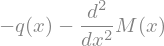

In [5]:
M_eq = -diff(M(x), x, 2) - q(x)

M_eq

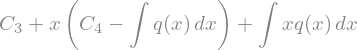

In [6]:
M_sol = dsolve(M_eq, M(x)).rhs.subs([(C1, C3), (C2, C4)])

M_sol

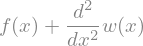

In [7]:
w_eq = f(x) + diff(w(x),x,2)
w_eq

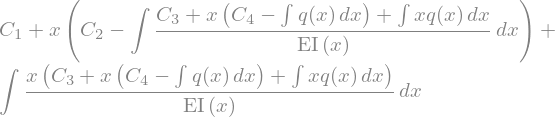

In [8]:
w_sol = dsolve(w_eq, w(x)).subs(f(x), M_sol/EI(x)).rhs

w_sol

Queremos estar seguros de que esta solución sea correcta. Reemplazamos los valores
conocidos para $E$, $I$ y $q$ para verificarlo.

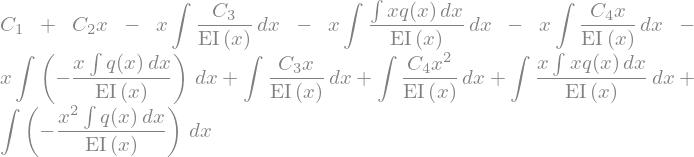

In [9]:
expand(w_sol)

## Viga en voladizo con carga en la punta

In [10]:
sub_list = [(q(x), 0), (EI(x), E*I)]
w_sol1 = w_sol.subs(sub_list).doit()

In [11]:
L, P = symbols('L P')

# Extremo fijo
bc_eq1 = w_sol1.subs(x, 0)
bc_eq2 = diff(w_sol1, x).subs(x, 0)

# Extremo libre
bc_eq3 = diff(w_sol1, x, 2).subs(x, L)
bc_eq4 = diff(w_sol1, x, 3).subs(x, L) + P/(E*I)

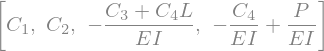

In [12]:
[bc_eq1, bc_eq2, bc_eq3, bc_eq4]

In [13]:
constants = solve([bc_eq1, bc_eq2, bc_eq3, bc_eq4], [C1, C2, C3, C4])
constants

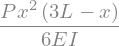

In [14]:
w_sol1.subs(constants).simplify()

## Viga en voladizo con carga uniformemente distribuida

In [15]:
Q = symbols("Q")
sub_list = [(q(x), Q), (EI(x), E*I)]
w_sol1 = w_sol.subs(sub_list).doit()

In [16]:
L = symbols('L')

# Extremo fijo
bc_eq1 = w_sol1.subs(x, 0)
bc_eq2 = diff(w_sol1, x).subs(x, 0)

# Extremo libre
bc_eq3 = diff(w_sol1, x, 2).subs(x, L)
bc_eq4 = diff(w_sol1, x, 3).subs(x, L)

In [17]:
constants = solve([bc_eq1, bc_eq2, bc_eq3, bc_eq4], [C1, C2, C3, C4])

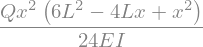

In [18]:
w_sol1.subs(constants).simplify()

## Viga en voladiczo con carga exponencial

In [19]:
A = symbols("A")
sub_list = [(q(x), A*exp(x)), (EI(x), E*I)]
w_sol1 = w_sol.subs(sub_list).doit()

In [20]:
L = symbols('L')

# Extremo fijo
bc_eq1 = w_sol1.subs(x, 0)
bc_eq2 = diff(w_sol1, x).subs(x, 0)

# Extremo libre
bc_eq3 = diff(w_sol1, x, 2).subs(x, L)
bc_eq4 = diff(w_sol1, x, 3).subs(x, L)

In [21]:
constants = solve([bc_eq1, bc_eq2, bc_eq3, bc_eq4], [C1, C2, C3, C4])

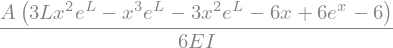

In [22]:
w_sol1.subs(constants).simplify()

## Carga uniforme y sección variable

In [23]:
Q, alpha = symbols("Q alpha")
sub_list = [(q(x), Q), (EI(x), E*(x + 1)/alpha)]
w_sol1 = w_sol.subs(sub_list).doit()

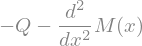

In [24]:
M_eq = -diff(M(x), x, 2) - Q

M_eq

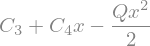

In [25]:
M_sol = dsolve(M_eq, M(x)).rhs.subs([(C1, C3), (C2, C4)])

M_sol

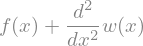

In [26]:
w_eq = f(x) + diff(w(x),x,2)
w_eq

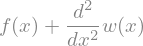

In [27]:
w_eq

In [28]:
L = symbols('L')

w_sol1 = dsolve(w_eq, w(x)).subs(f(x), M_sol/E*(2*L - x)/alpha).rhs

w_sol1 = w_sol1.doit()

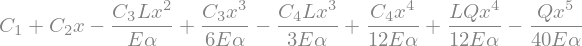

In [29]:
expand(w_sol1)

In [30]:
# Extremo fijo
bc_eq1 = w_sol1.subs(x, 0)
bc_eq2 = diff(w_sol1, x).subs(x, 0)

# Extremo libre
bc_eq3 = diff(w_sol1, x, 2).subs(x, L)
bc_eq4 = diff(w_sol1, x, 3).subs(x, L)

In [31]:
constants = solve([bc_eq1, bc_eq2, bc_eq3], [C1, C2, C3, C4])

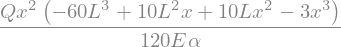

In [32]:
simplify(w_sol1.subs(constants).subs(C4, 0))

El momento en cada punto estaría dado por

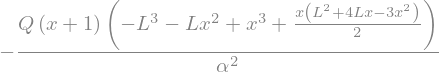

In [33]:
M = -E*(x + 1)/alpha*diff(w_sol1.subs(constants).subs(C4, 0), x, 2)
M

Y la fuerza de corte

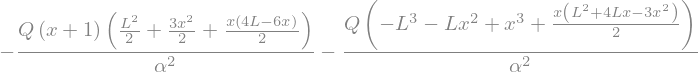

In [34]:
diff(M, x)

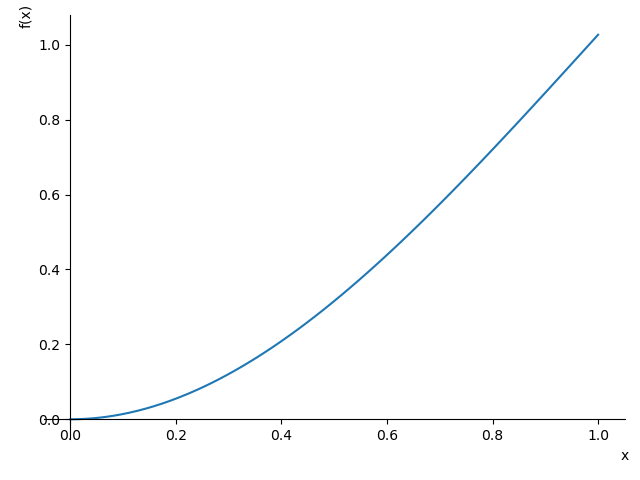

In [35]:
w_plot = w_sol1.subs(constants).subs({C4: 0, L: 1, Q: -1, E: 1, alpha: pi/9})
plot(w_plot, (x, 0, 1));